# (Ford Bike Data Set)
## by (Sayed Abdul-Monem)

## Investigation Overview

 Describe the overall goals of your presentation here.<br>
 what is the gender of the most riders ?<br>
 How long does the trip take ? <br>
 what is subscribers ratio to customers ?<br>
 what is the longest in trip duration cutomers or subscribers ? <br>
 what is the ratio of the bike sharing to non bike sharing trips? <br> 
 what is the time in which the most duration are taken per day ? <br>
 Does the trip duration changes between males and females ? <br>
 what is the time in which the most duration are taken per day of week?<br>

## Dataset Overview

> my data set is Ford bike trips and it contains the information of the trips 
 1.duration_sec             | 174952 non-null  float64       <br>
 2.start_time               | 174952 non-null  datetime64    <br>
 3.end_time                 | 174952 non-null  datetime64    <br>
 4.start_station_id         | 174952 non-null  object        <br>    
 5.start_station_name       | 174952 non-null  object        <br>
 6.start_station_latitude   | 174952 non-null  float64       <br>
 7.start_station_longitude  | 174952 non-null  float64       <br>
 8.end_station_id           | 174952 non-null  object        <br>
 9.end_station_name         | 174952 non-null  object        <br>
 10.end_station_latitude    | 174952 non-null  float64       <br>
 11.end_station_longitude   | 174952 non-null  float64       <br>
 12.bike_id                 | 174952 non-null  object        <br>
 13.user_type               | 174952 non-null  category      <br>
 14.member_birth_year       | 174952 non-null  float64       <br>
 15.member_gender           | 174952 non-null  object        <br>
 16.bike_share_for_all_trip | 174952 non-null  object  <br>
 17.member_age              | 174952 non-null  float64  

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df =pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [16]:
# Data Wrangling Steps 
df['duration_sec']=df['duration_sec'] / (60)
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df['user_type'] = df['user_type'].astype('category')
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['member_age'] = 2021 - df['member_birth_year']

## (Univariate )

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

##  What is the gender of the most riders ?
The the gender of the most riders is male  

Text(0.5, 1.0, 'Simulation between member_gender and count_number')

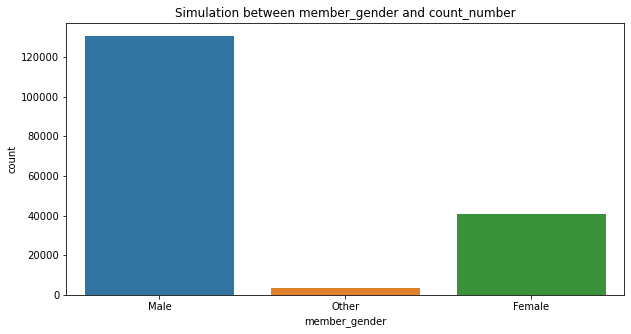

In [17]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='member_gender')
plt.title("Simulation between member_gender and count_number")

##  How long does the trip take ? 
the most duration trips are between 5 minutes to 15 minutes

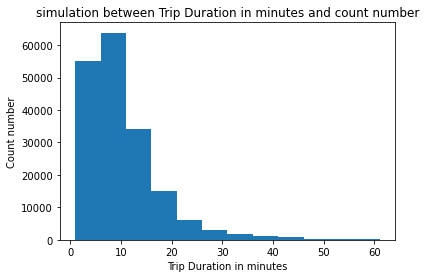

In [18]:
bins = np.arange(df['duration_sec'].min(),60+5,5)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Count number')
plt.title('simulation between Trip Duration in minutes and count number');

## what is subscribers ratio to customers ?
it seems that the subscribers are 90% of the bikers 

##  what is the ratio of the bike sharing to non bike sharing trips?
Bike sharing is very small compared to non bike sharing 

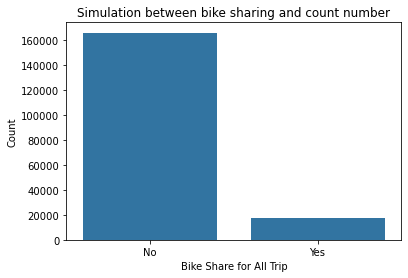

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color)
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')
plt.title('Simulation between bike sharing and count number');

## (bivariate 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

##  what is the longest in trip duration cutomers or subscribers ?
the above plot shows that the trips duration in minutes for subscribers are mor than the customers  

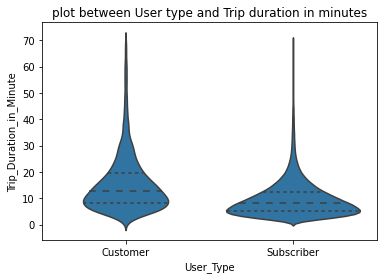

In [20]:
df = df.query('duration_sec < 70')
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('User_Type')
plt.ylabel('Trip_Duration_in_Minute')
plt.title('plot between User type and Trip duration in minutes');

In [21]:
## Adding some columns to get more visualizations 
df['month'] = df.start_time.dt.month
df['day'] = df.start_time.dt.weekday
df['hour'] = df.start_time.dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,month,day,hour
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,2,3,23
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0,2,3,23
6,19.116667,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38.0,2,3,23
7,26.916667,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,32.0,2,3,23
8,26.166667,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,33.0,2,3,23


##  what is the time in which the most duration are taken per day?
the trips from monday to friday are smaller than the trips in saturday and sunday which gives an indication that the trips are smaller in weekdays than in weekends

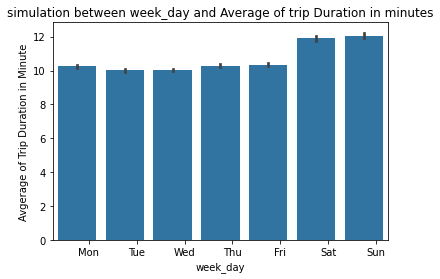

In [22]:
sb.barplot(data=df, x='day', y='duration_sec', color=base_color)
plt.xlabel('week_day')
plt.ylabel('Avgerage of Trip Duration in Minute')
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('simulation between week_day and Average of trip Duration in minutes');

## Does the trip duration changes between males and females ?
the trip duration is almost the same for all genders 

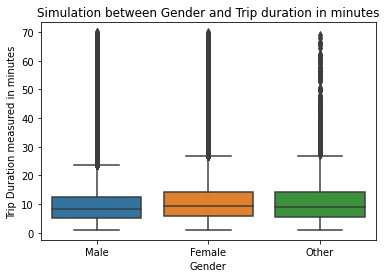

In [23]:
sb.boxplot(data=df,x='member_gender' ,y = 'duration_sec')
plt.xlabel('Gender')
plt.ylabel('Trip Duration measured in minutes')
plt.title('Simulation between Gender and Trip duration in minutes');

## (Multivariate 3)



## Multivariate Summary 
there no big changes in the duration per hour for the subscribers but there is a big 
change in duration per hour for the customers.there no big changes in the duration per day for the subscribers but there is a big change in duration per day for the customers as it increases high in saturday and sunday  

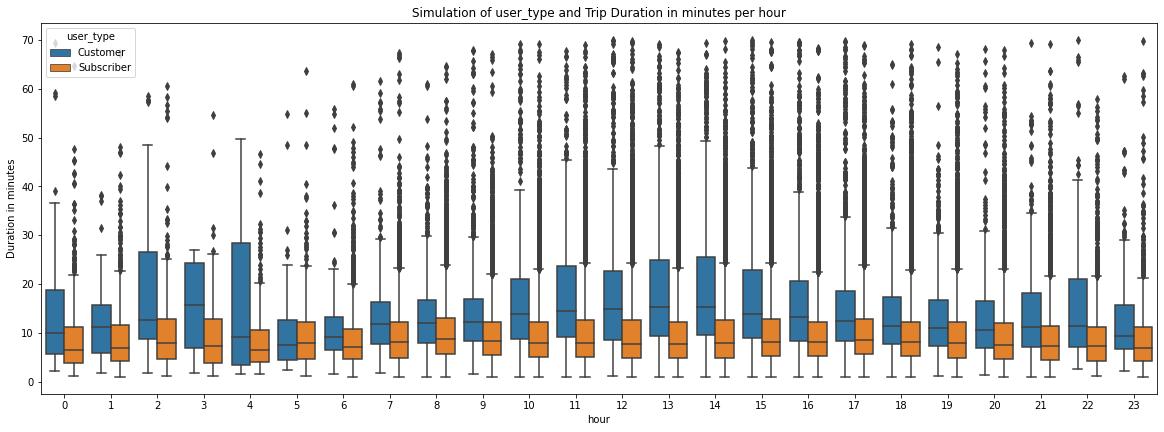

In [24]:
df = df.query('duration_sec < 70')
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sb.boxplot(data=df,x="hour", y="duration_sec", hue="user_type")
plt.title('Simulation of user_type and Trip Duration in minutes per hour',fontdict={'fontsize':12})
plt.ylabel('Duration in minutes');

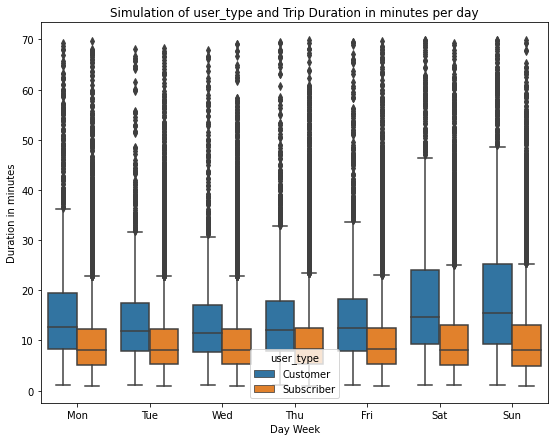

In [25]:
df = df.query('duration_sec < 70')
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sb.boxplot(data = df, x="day", y="duration_sec", hue="user_type")
plt.xticks(ticks=[*range(0,7)],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Simulation of user_type and Trip Duration in minutes per day',fontdict={'fontsize':12})
plt.xlabel("Day Week")
plt.ylabel('Duration in minutes');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!